Importação das bibliotecas necessárias e leitura da base de dados

Fonte base de dados: https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('dados_ind.csv')
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


Analise inicial da base da dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


Verificação de dados duplicados

In [ ]:

duplicates = df.duplicated().sum()
print("Duplicados encontrados:", duplicates)
print()


Duplicados encontrados: 0



Gráfico de dispersão das amostras de temperatura.

Análise da distribuição dos dados ao longo da amostra. Em azul os pontos que não apresentam falha, em laranja, os com falha.

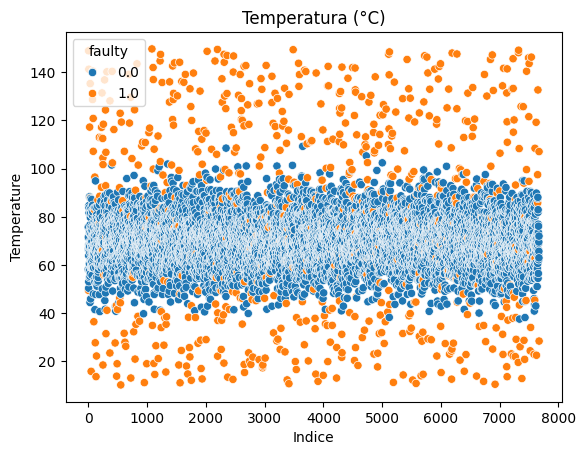

In [ ]:
sns.scatterplot(data=df, x=df.index, y='temperature', hue='faulty')

plt.xlabel('Indice')
plt.ylabel('Temperature')
plt.title('Temperatura (°C)')
plt.show()

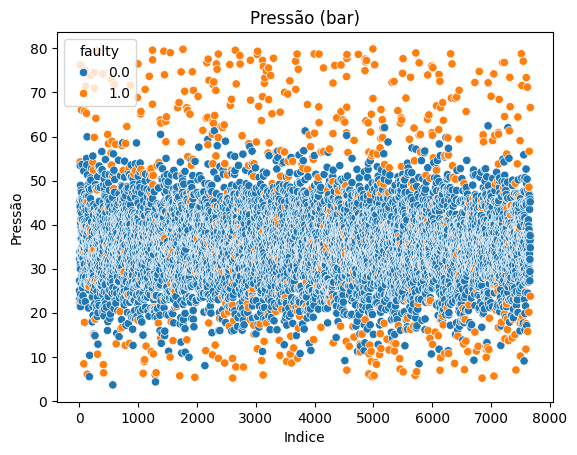

In [ ]:
sns.scatterplot(data=df, x=df.index, y='pressure', hue='faulty')

plt.xlabel('Indice')
plt.ylabel('Pressão')
plt.title('Pressão (bar)')
plt.show()

In [ ]:
Verificação do nível de correlação dos dados.

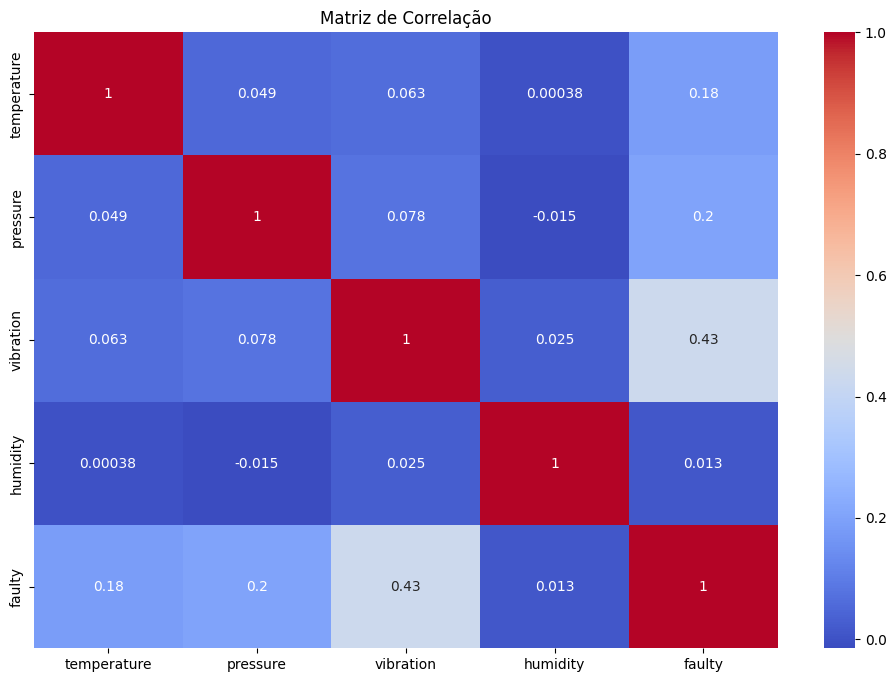

In [ ]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

Eliminando features não numéricas

In [ ]:
df=df.drop(['location'], axis=1)

In [ ]:
df.head()

,temperature,pressure,vibration,humidity,faulty
0,58.180180,25.029278,0.606516,45.694907,0.0
1,75.740712,22.954018,2.338095,41.867407,0.0
2,71.358594,27.276830,1.389198,58.954409,0.0
3,71.616985,32.242921,1.770690,40.565138,0.0
4,66.506832,45.197471,0.345398,43.253795,0.0


Treinamento e teste do modelo

In [ ]:
#Definição das features e variável alvo
X=df.drop(['faulty'], axis=1)
y=df['faulty']

#Divisão dos dados entre treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Criação do modelo
modelo = LogisticRegression()

#Treinamento do modelo
modelo.fit(X_train, y_train)

#Predição das classes
y_pred = modelo.predict(X_test)

#Acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

#Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.9348534201954397

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1377
         1.0       0.98      0.37      0.54       158

    accuracy                           0.93      1535
   macro avg       0.96      0.69      0.75      1535
weighted avg       0.94      0.93      0.92      1535



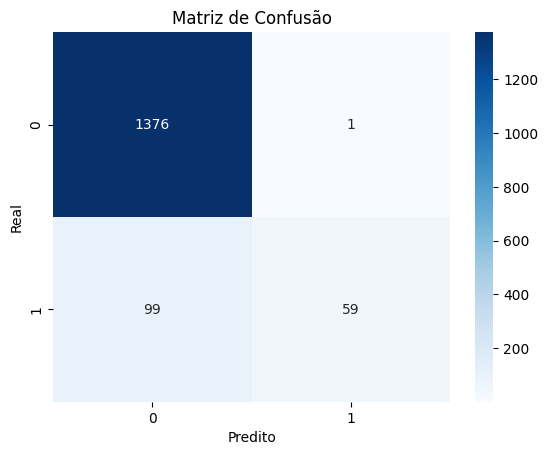

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
df['faulty'].value_counts()[1.0]

np.int64(767)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Definição das features e variável alvo
X=df.drop(['faulty'], axis=1)
y=df['faulty']

# Dividir os dados em 80% treino e 20% teste (com random_state para reproducibilidade)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo KNN, aqui com k=5 vizinhos (pode ajustar depois)
model = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9732899022801303
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1377
         1.0       0.95      0.78      0.86       158

    accuracy                           0.97      1535
   macro avg       0.96      0.89      0.92      1535
weighted avg       0.97      0.97      0.97      1535



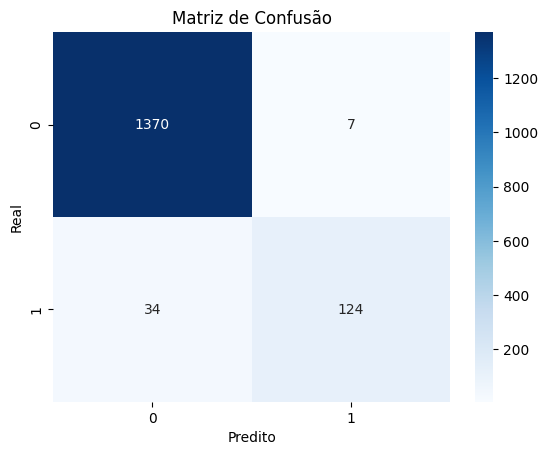

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()